<h1 align="center">Descripción de un sistema formado por dados.</h1>
<div align="right">David A. Miranda, PhD<br>2021</div>

## 1. Importar librerías

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

## 2. Planteamiento del problema
Sean $D$ dados, cada uno de ellos con $C$ caras. Un número natural único se utiliza para identificar cada cara, de tal manera que se puede diferenciar una cara de otra.  Si se lanzan los $D$ dados, ¿cuál es el valor más probable obtenido al sumar los números en cada cara?

### 2.1. Especificación del estado del sistema
El sistema, en este caso, corresponde con $D$ dados, cada uno de los cuales puede tener un valor entre 1 y $C$.  Esto quiere decir que para identificar un microestado se requieren $D$ números, correspondientes a los valores obtenidos para los dados.  En este caso el parámetro $y$ es la suma de los números obtenidos en los datos.

### 2.2. Postulado básico
Se asume que cada cara en cada dado es igualmente probable, por lo tanto, el lanzamiento de un dado se puede modelar con una variable aleatoria uniforme discreta.

### 2.3. Ensamble
En este caso el ensamble corresponderá con un conjunto formado por los sistemas preparados bajo las mismas condiciones, es decir, $D$ dados lanzados $N$ veces.  Cada lanzamiento corresponde con un experimento.

Un microestado está determinado por $D$ números, cuya suma corresponde con el parámetro $y$.  Esto implica que por cada uno de los $N$ experimentos existen $D + 1$ números asociados al microestado, siendo $D$ la cantidad de números que especifican dicho microestado y el otro número, el valor para $y$.

### 2.4. Determinación de la probabilidad $P(y)$
La probabilidad $P(y)$ que la suma de las caras de los dados esté entre $y$ e $y+\delta y$ está determinada por el cociente entre el número de microestados en el ensamble con $y$ entre $y$ e $y+\delta y$ dividida por el total de experimentos $N$.

In [2]:
D = 4 # Número de dados
C = 6 # Número de caras de un dado
N = 1000 # Número de experimentos: sistemas en el ensamble

## 3. Un dado: variable aleatoria uniforme discreta

In [3]:
p = np.random.randint(low=1, high=C+1, size=N)

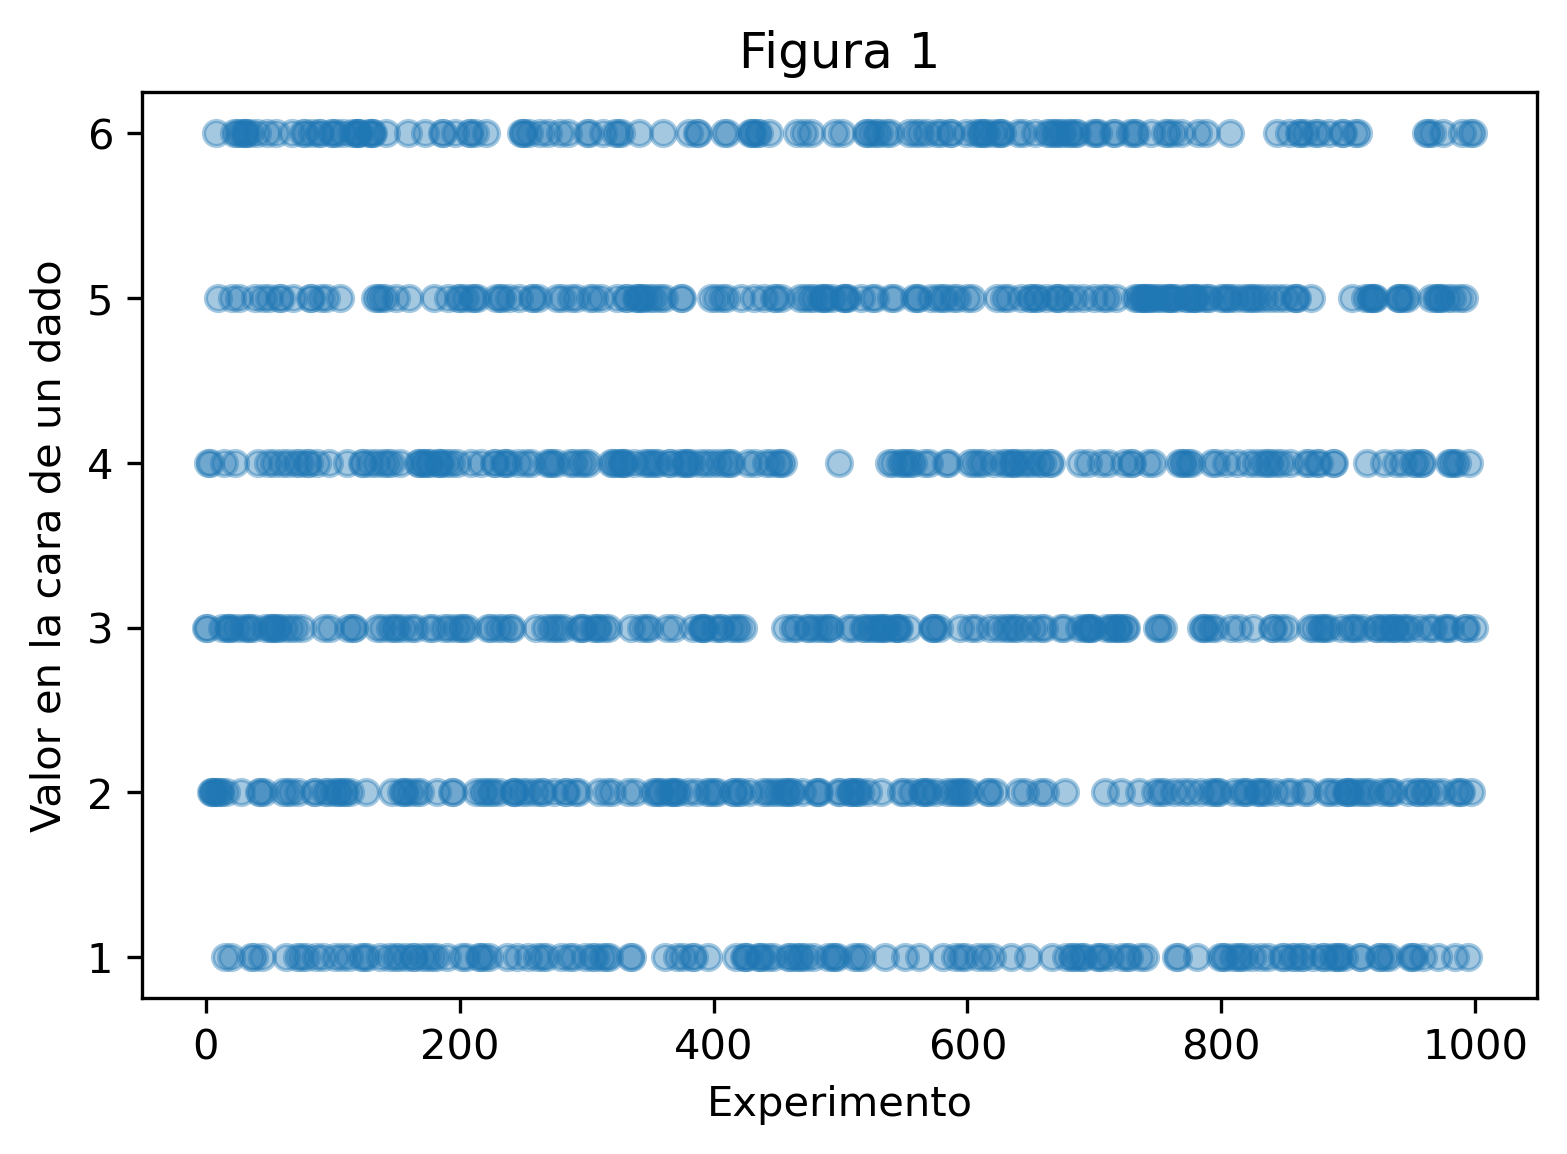

In [4]:
plt.figure(dpi=300)
plt.plot(p, 'o', alpha=0.4)
plt.xlabel('Experimento')
plt.ylabel('Valor en la cara de un dado')
_ = plt.title('Figura 1')

## 4. Modelo y simulación
### 4.1. Construcción del ensamble

In [5]:
ensamble_dict = {}
for d in range(D):
    key = 'd%d' % (d+1)
    values = np.random.randint(low=1, high=C+1, size=N)
    ensamble_dict[key] = list(values)
ensamble = pd.DataFrame(ensamble_dict)
ensamble['y'] = ensamble.sum(axis=1)
ensamble

,d1,d2,d3,d4,y
0,6,5,5,1,17
1,6,5,6,3,20
2,3,6,1,3,13
3,1,4,1,5,11
4,4,1,6,1,12
...,...,...,...,...,...
995,4,5,6,1,16
996,4,2,5,1,12
997,4,5,1,5,15
998,2,6,2,3,13


### 4.2. Descripción del ensamble

In [6]:
ensamble.describe()

,d1,d2,d3,d4,y
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.51700,3.485000,3.549000,3.621000,14.172000
std,1.75065,1.721261,1.667447,1.692402,3.399113
min,1.00000,1.000000,1.000000,1.000000,4.000000
25%,2.00000,2.000000,2.000000,2.000000,12.000000
50%,4.00000,4.000000,4.000000,4.000000,14.000000
75%,5.00000,5.000000,5.000000,5.000000,16.250000
max,6.00000,6.000000,6.000000,6.000000,23.000000


## 4.3. Número de estados entre $y$ e $y+\delta y$

In [7]:
bins = 10
y = ensamble.y.to_numpy()
dy = (C*D - D) / bins
y_bins = np.linspace(D, C*D - dy, bins)
num_estados_y = [np.count_nonzero((y >= yk) & (y < yk + dy)) for yk in y_bins]
num_estados = sum(num_estados_y)

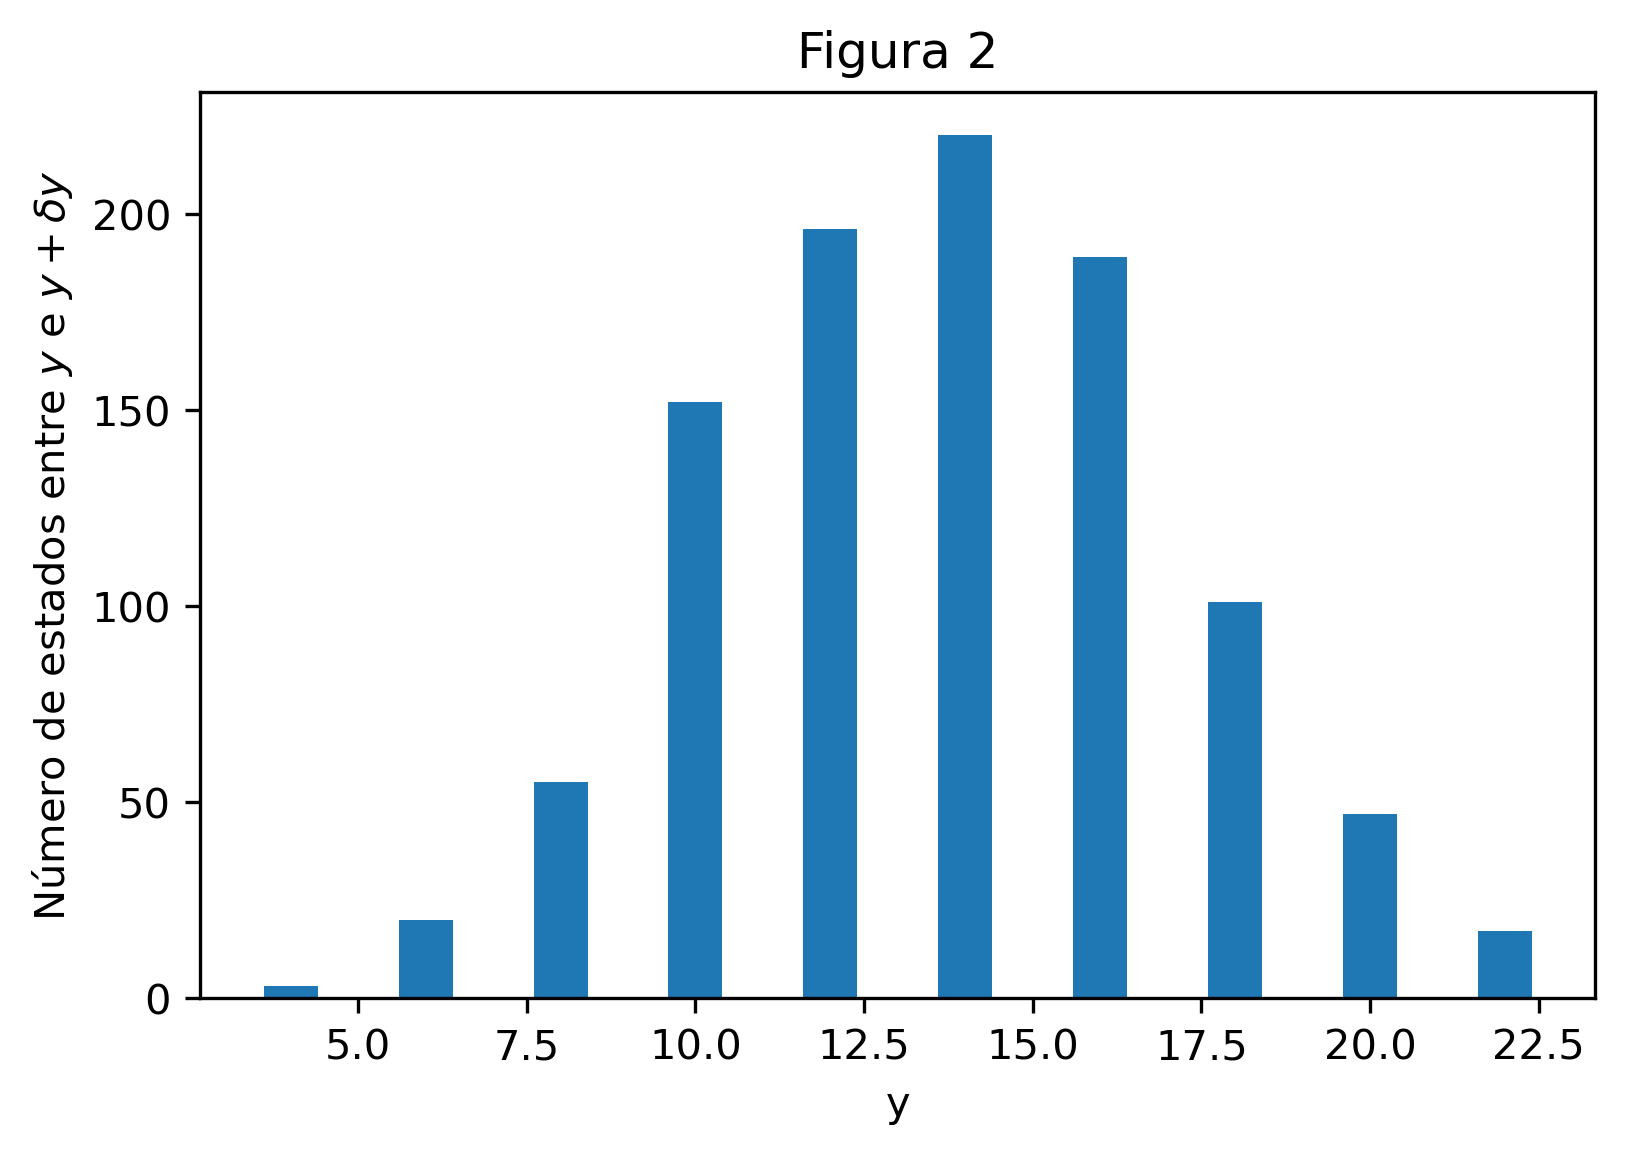

In [8]:
plt.figure(dpi=300)
plt.bar(x=y_bins, height=num_estados_y)
plt.xlabel('y')
plt.ylabel(r'Número de estados entre $y$ e $y + \delta y$')
_ = plt.title('Figura 2')

## 4.4. Probabilidad de encontrar el microestado para $y$ entre $y$ e $y + \delta y$

In [9]:
P = np.array(num_estados_y) / num_estados

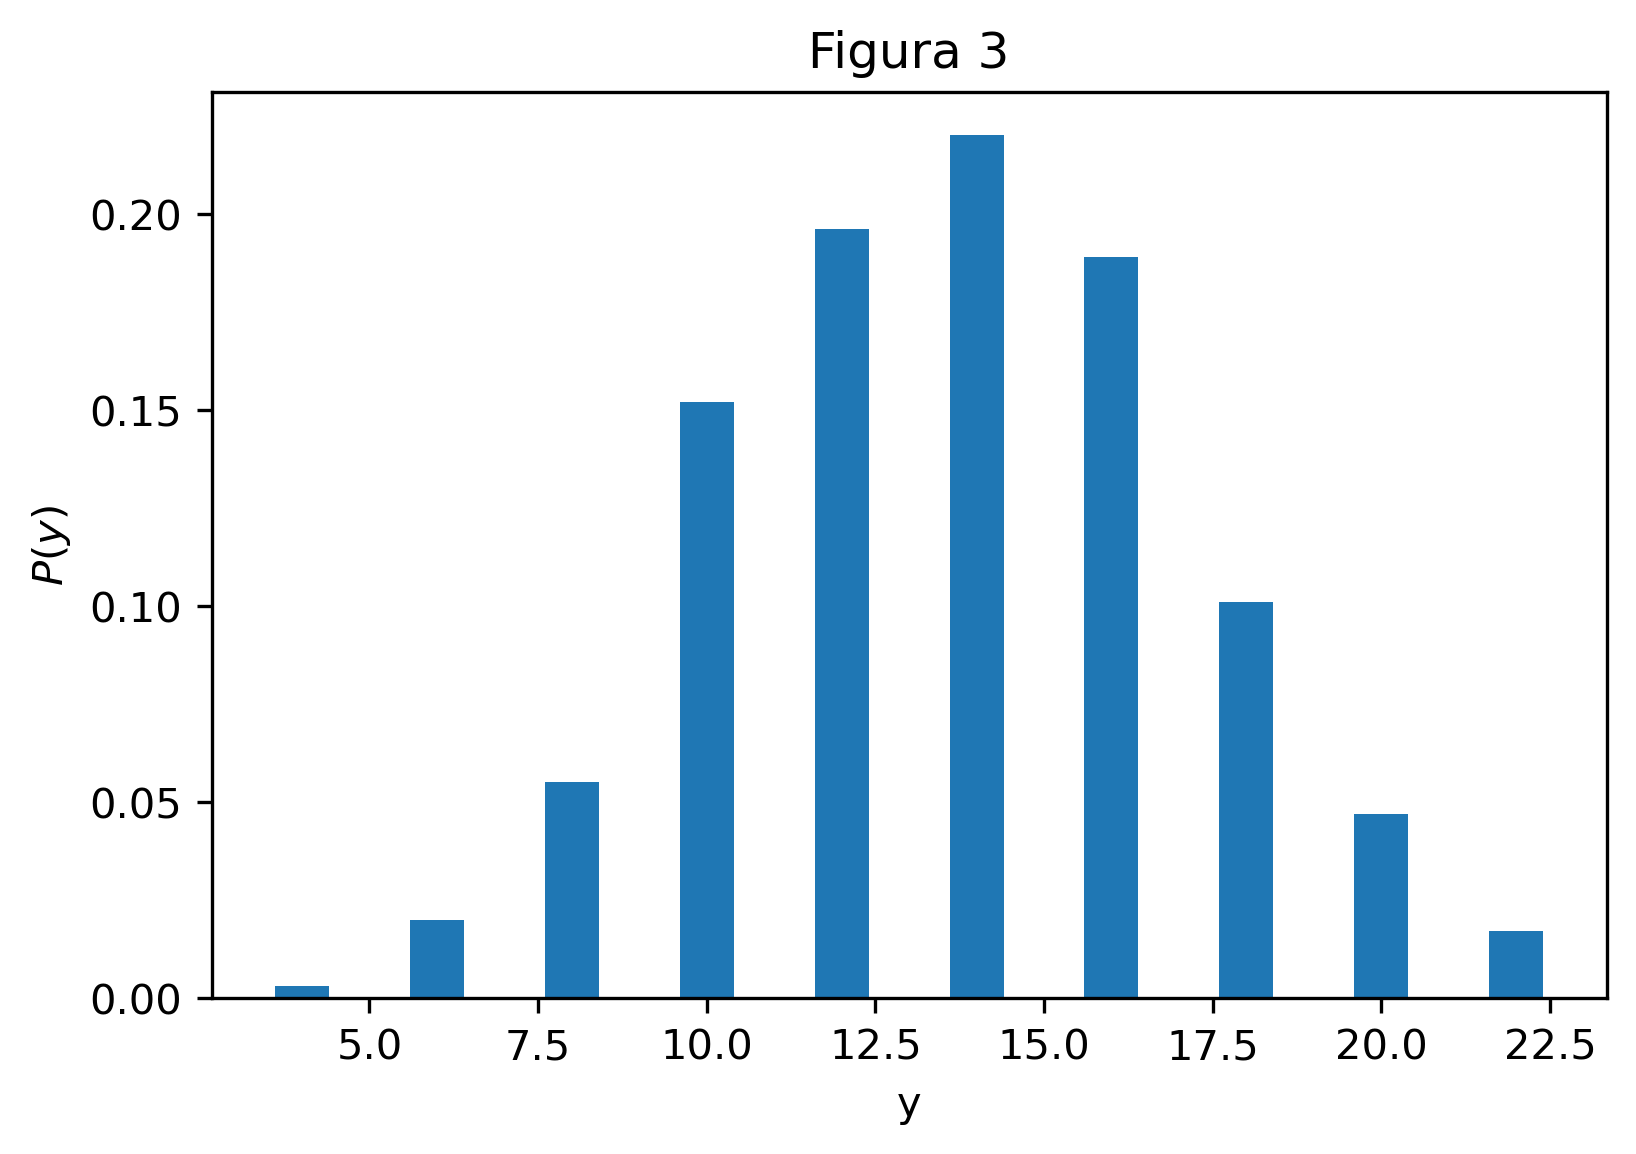

In [10]:
plt.figure(dpi=300)
plt.bar(x=y_bins, height=P)
plt.xlabel('y')
plt.ylabel(r'$P(y)$')
_ = plt.title('Figura 3')

## 5. Preguntas de autoexplicación
### 5.1. Primer bloque de preguntas

5.1.1. ¿Cuál es el propósito de definir el parámetro $y$?

5.2.2. ¿En qué consiste un experimento y cómo se relaciona dicho experimento con la preparación del ensamble?

5.2.3. ¿Por qué el número de microestados del ensamble es igual al número de experimentos $N$?

5.2.4. Interprete la Figura 1 en el marco del problema resuelto en este Jupyter Notebook.

### 5.2. Segundo bloque de preguntas

5.2.1. ¿Por qué se puede decir que la tabla mostrada en el ítem 4.1 representa al ensamble conformado por $N$ sistemas preparados bajo las mismas condiciones?

5.2.2. Utilice los resultados mostrados en el ítem 4.2 para describir los datos contenidos en *ensamble*.

### 5.3. Tercer bloque de preguntas
5.3.1. En el ítem 4.3, ¿cuál es el propósito de definir *bins*?

5.3.2. En el ítem 4.3, ¿cómo se determina el número de estados entre $y$ e $y + \delta y$?

5.3.3. Interprete las Figuras 2 y 3.  Tenga en cuenta el resultado mostrado en el ítem 4.2.

5.3.4. ¿Cómo afecta al valor esperado $\bar{y}$ los números de dados $D$ y caras $C$?

End!